# Preparación de datos

In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [2]:
spark

In [4]:
##
## Row representa una fila en un RDD
##
from pyspark.sql import Row
##
## Crea un DataFrame a partir del archivo con
## formato CSV
##
nombre_archivo="prueba"
df = spark.read.load("D:\\CLASES\\ELECTIVA 3 BigData\\Taller_final\\"+nombre_archivo+".csv",
                     format="csv",
                     sep="|",
                     inferSchema= True,
                     encoding='UTF-8',
                     decimal=".",
                     header="true")
df.printSchema()

root
 |-- cod_alumno: integer (nullable = true)
 |-- ciudad: string (nullable = true)
 |-- sexo_f: integer (nullable = true)
 |-- puntaje_ingreso: double (nullable = true)
 |-- promedio_notas: double (nullable = true)
 |-- total_creditos_logrados: double (nullable = true)
 |-- biologia: double (nullable = true)
 |-- matematicas: double (nullable = true)
 |-- filosofia: double (nullable = true)
 |-- fisica: double (nullable = true)
 |-- historia: double (nullable = true)
 |-- quimica: double (nullable = true)
 |-- lenguaje: double (nullable = true)
 |-- geografia: double (nullable = true)
 |-- idiomas: double (nullable = true)
 |-- sociales: double (nullable = true)
 |-- lecturacritica: double (nullable = true)
 |-- ciencias: double (nullable = true)
 |-- razonamiento: double (nullable = true)
 |-- competenciaciud: double (nullable = true)
 |-- valor_matricula: double (nullable = true)
 |-- valor_servicios: double (nullable = true)
 |-- ingresos: double (nullable = true)
 |-- vive_famil

# Contar cantidad de registros

In [5]:
df.count()

247

# Contar cantidad de registros por clase

In [6]:
df.groupby("clase").count().show()

+-----+-----+
|clase|count|
+-----+-----+
|    1|  141|
|    0|  106|
+-----+-----+



# Contar estudiantes por ciudad

In [7]:
df.groupby("ciudad").count().show()

+--------------------+-----+
|              ciudad|count|
+--------------------+-----+
|TUMACO           ...|   17|
|PASTO            ...|  182|
|IPIALES          ...|   33|
|TUQUERRES        ...|   15|
+--------------------+-----+



# Contar estudiantes por año

In [8]:
df.groupby("anio_reporte").count().orderBy("anio_reporte").show()

+------------+-----+
|anio_reporte|count|
+------------+-----+
|      2017.0|  247|
+------------+-----+



# Explorar valores faltantes

In [9]:
from pyspark.sql.functions import isnan, when, count, col
Dict_Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'cod_alumno': 0,
 'ciudad': 0,
 'sexo_f': 0,
 'puntaje_ingreso': 0,
 'promedio_notas': 0,
 'total_creditos_logrados': 0,
 'biologia': 3,
 'matematicas': 3,
 'filosofia': 3,
 'fisica': 3,
 'historia': 3,
 'quimica': 3,
 'lenguaje': 3,
 'geografia': 3,
 'idiomas': 6,
 'sociales': 11,
 'lecturacritica': 137,
 'ciencias': 137,
 'razonamiento': 137,
 'competenciaciud': 137,
 'valor_matricula': 7,
 'valor_servicios': 7,
 'ingresos': 7,
 'vive_familia': 0,
 'estrato': 18,
 'estrato_vivira': 18,
 'actualmente_trabaja': 3,
 'valor_matric_colegio': 3,
 'ano_pago_colegio': 16,
 'ingresos_familiares': 3,
 'ano_ingresos': 16,
 'numero_aportantes': 16,
 'numero_hermanos': 3,
 'numero_hermanos_est_superior': 3,
 'edad_inicio': 1,
 'edad_reporte': 1,
 'anio_reporte': 0,
 'clase': 0}

In [10]:
for col_name in df.dtypes:
    df.describe(col_name[0]).show()

+-------+-------------------+
|summary|         cod_alumno|
+-------+-------------------+
|  count|                247|
|   mean|9.351730415546559E8|
| stddev|9.572576096355535E8|
|    min|           22033207|
|    max|         2140361003|
+-------+-------------------+

+-------+--------------------+
|summary|              ciudad|
+-------+--------------------+
|  count|                 247|
|   mean|                null|
| stddev|                null|
|    min|IPIALES          ...|
|    max|TUQUERRES        ...|
+-------+--------------------+

+-------+-----------------+
|summary|           sexo_f|
+-------+-----------------+
|  count|              247|
|   mean|0.242914979757085|
| stddev|0.429714885692917|
|    min|                0|
|    max|                1|
+-------+-----------------+

+-------+------------------+
|summary|   puntaje_ingreso|
+-------+------------------+
|  count|               247|
|   mean|59.481133603238895|
| stddev|15.699722446227561|
|    min|             

+-------+------------------+
|summary|       edad_inicio|
+-------+------------------+
|  count|               246|
|   mean|19.117886178861788|
| stddev| 3.087553222420236|
|    min|              16.0|
|    max|              32.0|
+-------+------------------+

+-------+-----------------+
|summary|     edad_reporte|
+-------+-----------------+
|  count|              246|
|   mean|23.25609756097561|
| stddev|4.647081969500787|
|    min|             16.0|
|    max|             41.0|
+-------+-----------------+

+-------+------------+
|summary|anio_reporte|
+-------+------------+
|  count|         247|
|   mean|      2017.0|
| stddev|         0.0|
|    min|      2017.0|
|    max|      2017.0|
+-------+------------+

+-------+-------------------+
|summary|              clase|
+-------+-------------------+
|  count|                247|
|   mean| 0.5708502024291497|
| stddev|0.49595978010896336|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



# Métodos para autocompletar los valores faltantes

1 imputar valores faltantes con un cero

In [11]:
complete_dict = dict()
for col_name in df.dtypes:
    if col_name[1]=='string':
        complete_dict[col_name[0]]="DESCONOCIDO"
    else:
        complete_dict[col_name[0]]=0    
df_ml_complete = df.na.fill(complete_dict)      


2 imputar valores faltantes con un valor fuera de rango -99

In [11]:
complete_dict = dict()
for col_name in df.dtypes:
    if col_name[1]=='string':
        complete_dict[col_name[0]]="DESCONOCIDO"
    else:
        complete_dict[col_name[0]]=-99    
df_ml_complete = df.na.fill(complete_dict)      


3 imputar valores faltantes con el promedio

In [ ]:
complete_dict = dict()
for col_name in df.dtypes:
    if col_name[1]=='string':
        complete_dict[col_name[0]]="DESCONOCIDO"
    else:
        d=df.selectExpr("avg("+col_name[0]+")").rdd.map(list)
        v=max(d.collect()[0])
        complete_dict[col_name[0]]=v   
df_ml_complete = df.na.fill(complete_dict)      

In [12]:
from pyspark.sql.functions import isnan, when, count, col
Dict_Null = {col:df_ml_complete.filter(df_ml_complete[col].isNull()).count() for col in df_ml_complete.columns}
Dict_Null

{'cod_alumno': 0,
 'ciudad': 0,
 'sexo_f': 0,
 'puntaje_ingreso': 0,
 'promedio_notas': 0,
 'total_creditos_logrados': 0,
 'biologia': 0,
 'matematicas': 0,
 'filosofia': 0,
 'fisica': 0,
 'historia': 0,
 'quimica': 0,
 'lenguaje': 0,
 'geografia': 0,
 'idiomas': 0,
 'sociales': 0,
 'lecturacritica': 0,
 'ciencias': 0,
 'razonamiento': 0,
 'competenciaciud': 0,
 'valor_matricula': 0,
 'valor_servicios': 0,
 'ingresos': 0,
 'vive_familia': 0,
 'estrato': 0,
 'estrato_vivira': 0,
 'actualmente_trabaja': 0,
 'valor_matric_colegio': 0,
 'ano_pago_colegio': 0,
 'ingresos_familiares': 0,
 'ano_ingresos': 0,
 'numero_aportantes': 0,
 'numero_hermanos': 0,
 'numero_hermanos_est_superior': 0,
 'edad_inicio': 0,
 'edad_reporte': 0,
 'anio_reporte': 0,
 'clase': 0}

In [13]:
for col_name in df_ml_complete.dtypes:
    df_ml_complete.describe(col_name[0]).show()

+-------+-------------------+
|summary|         cod_alumno|
+-------+-------------------+
|  count|                247|
|   mean|9.351730415546559E8|
| stddev|9.572576096355535E8|
|    min|           22033207|
|    max|         2140361003|
+-------+-------------------+

+-------+--------------------+
|summary|              ciudad|
+-------+--------------------+
|  count|                 247|
|   mean|                null|
| stddev|                null|
|    min|IPIALES          ...|
|    max|TUQUERRES        ...|
+-------+--------------------+

+-------+-----------------+
|summary|           sexo_f|
+-------+-----------------+
|  count|              247|
|   mean|0.242914979757085|
| stddev|0.429714885692917|
|    min|                0|
|    max|                1|
+-------+-----------------+

+-------+------------------+
|summary|   puntaje_ingreso|
+-------+------------------+
|  count|               247|
|   mean|59.481133603238895|
| stddev|15.699722446227561|
|    min|             

+-------+------------------+
|summary| numero_aportantes|
+-------+------------------+
|  count|               247|
|   mean|-5.133603238866397|
| stddev| 24.76266130058458|
|    min|             -99.0|
|    max|               4.0|
+-------+------------------+

+-------+-------------------+
|summary|    numero_hermanos|
+-------+-------------------+
|  count|                247|
|   mean|0.46153846153846156|
| stddev| 11.137606516856648|
|    min|              -99.0|
|    max|                7.0|
+-------+-------------------+

+-------+----------------------------+
|summary|numero_hermanos_est_superior|
+-------+----------------------------+
|  count|                         247|
|   mean|         -0.8421052631578947|
| stddev|          10.941240344005672|
|    min|                       -99.0|
|    max|                         7.0|
+-------+----------------------------+

+-------+------------------+
|summary|       edad_inicio|
+-------+------------------+
|  count|               247|

# Transformar la ciudad a Dummies

In [14]:
df_ml_complete.createOrReplaceTempView("estudiantes")
sql=("select case when trim(e.ciudad)='LA UNION' then 1 else 0 end ciudad_union,"+
     "case when trim(e.ciudad)='TUMACO' then 1 else 0 end ciudad_tumaco,"+
     "case when trim(e.ciudad)='PASTO' then 1 else 0 end ciudad_pasto,"+
     "case when trim(e.ciudad)='IPIALES' then 1 else 0 end ciudad_ipiales,"+
     "case when trim(e.ciudad)='SAMANIEGO' then 1 else 0 end ciudad_samaniego,"+
     "e.*"+
     "from estudiantes e"
    )

df_procesado=spark.sql(sql)
df_procesado=df_procesado.drop("ciudad")
df_procesado.printSchema()

root
 |-- ciudad_union: integer (nullable = false)
 |-- ciudad_tumaco: integer (nullable = false)
 |-- ciudad_pasto: integer (nullable = false)
 |-- ciudad_ipiales: integer (nullable = false)
 |-- ciudad_samaniego: integer (nullable = false)
 |-- cod_alumno: integer (nullable = false)
 |-- sexo_f: integer (nullable = false)
 |-- puntaje_ingreso: double (nullable = false)
 |-- promedio_notas: double (nullable = false)
 |-- total_creditos_logrados: double (nullable = false)
 |-- biologia: double (nullable = false)
 |-- matematicas: double (nullable = false)
 |-- filosofia: double (nullable = false)
 |-- fisica: double (nullable = false)
 |-- historia: double (nullable = false)
 |-- quimica: double (nullable = false)
 |-- lenguaje: double (nullable = false)
 |-- geografia: double (nullable = false)
 |-- idiomas: double (nullable = false)
 |-- sociales: double (nullable = false)
 |-- lecturacritica: double (nullable = false)
 |-- ciencias: double (nullable = false)
 |-- razonamiento: doubl

# Aplicar Modelo Entrenado y Evaluar

Cargar modelo y variables

In [15]:
import joblib
from pyspark.ml.classification import DecisionTreeClassifier,DecisionTreeClassificationModel



modelo = DecisionTreeClassificationModel.load('D:\\CLASES\\ELECTIVA 3 BigData\\Taller_final\\modelo_99_arbol')
important_features=joblib.load('D:\\CLASES\\ELECTIVA 3 BigData\\Taller_final\\columnas_99.dat')



Filtrar variables

In [16]:
from pyspark.ml.feature import VectorAssembler

assembler_new = VectorAssembler(inputCols=important_features, outputCol='features')
prueba = assembler_new.transform(df_procesado)


prueba.select('features').take(1)
prueba.select('features').show(5)

+--------------------+
|            features|
+--------------------+
|[33.0,2.604761904...|
|[34.0,2.586274509...|
|[36.0,2.933333333...|
|[38.0,3.467391304...|
|[35.0,3.031868131...|
+--------------------+
only showing top 5 rows



 Evaluar

In [21]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator,BinaryClassificationEvaluator
from sklearn.metrics import accuracy_score,precision_score,classification_report,balanced_accuracy_score,f1_score
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

def eval_model(testData,model):
    print("____________________________________")
    predictions_test = model.transform(testData)
    # Select (prediction, true label) and compute test error
    evaluator = BinaryClassificationEvaluator(labelCol='clase',rawPredictionCol='probability',metricName='areaUnderROC')
    
    auroc_test = evaluator.evaluate(predictions_test)
    
    print("AUC prueba = %g" % (auroc_test))



    rfModel = model
    print(rfModel)  # summary only


import matplotlib.pyplot as plt 
from pyspark.sql.functions import col
import numpy as np

def grafico_roc(testData,model):
    pred = model.transform(testData)
    pred_pd = pred.select(['clase', 'prediction', 'probability']).toPandas()

    pred_pd['probability'] = pred_pd['probability'].map(lambda x: list(x))
    pred_pd['encoded_clase'] = pred_pd['clase'].map(lambda x: np.eye(2)[int(x)])
    y_pred = np.array(pred_pd['probability'].tolist())
    y_true = np.array(pred_pd['encoded_clase'].tolist())

    fpr, tpr, threshold = roc_curve(y_score=y_pred[:,1], y_true=y_true[:,1])
    auc_r = auc(fpr, tpr)

    plt.figure()
    plt.plot([0,1], [0,1], 'k--', color='orange')
    plt.plot(fpr, tpr, label='auc = {:.3f}'.format(auc_r))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    
def grafico_roc_select_proba(testData,model,prob):
    pred = model.transform(testData)
    pred_pd = pred.select(['clase', 'prediction', 'probability']).toPandas()

    pred_pd['probability'] = pred_pd['probability'].map(lambda x: list(x))
    pred_pd['encoded_clase'] = pred_pd['clase'].map(lambda x: np.eye(2)[int(x)])
    y_pred = np.array(pred_pd['probability'].tolist())
    y_true = np.array(pred_pd['encoded_clase'].tolist())
    i=1
    y_pred[:,i] = [1 if x >= prob else 0 for x in y_pred[:,i]]
    fpr, tpr, threshold = roc_curve(y_score=y_pred[:,i], y_true=pred_pd['clase'])
    auc_r = auc(fpr, tpr)

    plt.figure()
    plt.plot([0,1], [0,1], 'k--', color='orange')
    plt.plot(fpr, tpr, label='auc = {:.3f}'.format(auc_r))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    
    
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# Función para plot de la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')

import numpy as np

def printMc(testData,modelo,norm):
    
    class_names = [i for i in range(2)]
    pred = modelo.transform(testData)
    pred_pd = pred.select(['clase', 'prediction', 'probability']).toPandas()
    y_test=pred_pd['clase']
    cnf_matrix = confusion_matrix(y_test, pred_pd['prediction']) 
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = norm, title='Matriz de Confusión')


    tn, fp, fn, tp = confusion_matrix(y_test, pred_pd['prediction']).ravel()

    print("verdaderos positivos:",tp)
    print("verdaderos negativos:",tn)
    print("falsos positivos:",fp)
    print("falsos negativos:",fn)

    accuracy=(tp+tn)/(tp+tn+fp+fn)
    print("accuracy:",accuracy)
    accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
    print("accuracy balanced:",accuracy_balanced)

Normalized confusion matrix
verdaderos positivos: 128
verdaderos negativos: 97
falsos positivos: 9
falsos negativos: 13
accuracy: 0.9109311740890689
accuracy balanced: 0.9114478790311789


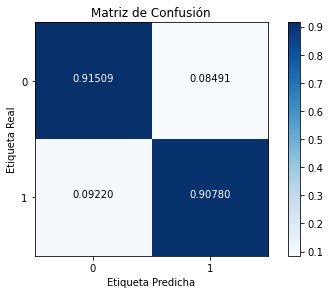

In [22]:
printMc(prueba,modelo,True)

____________________________________
AUC prueba = 0.964807
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_ee64350f293c, depth=10, numNodes=79, numClasses=2, numFeatures=17


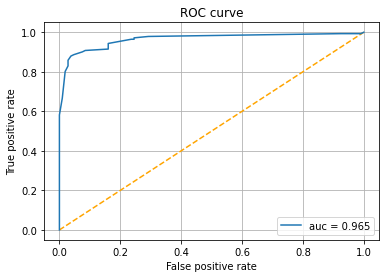

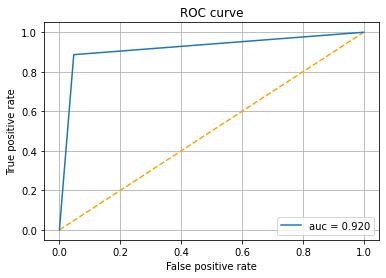

In [41]:
eval_model(prueba,modelo)  
#%matplotlib notebook
grafico_roc(prueba,modelo)
grafico_roc_select_proba(prueba,modelo,0.7)
# print(modelo)